# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


The name of the card is the target feature. There is a relationship between the card name and combo type

C:\Users\nekao\AppData\Local\Temp\ipykernel_14584\1598955432.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'count'))


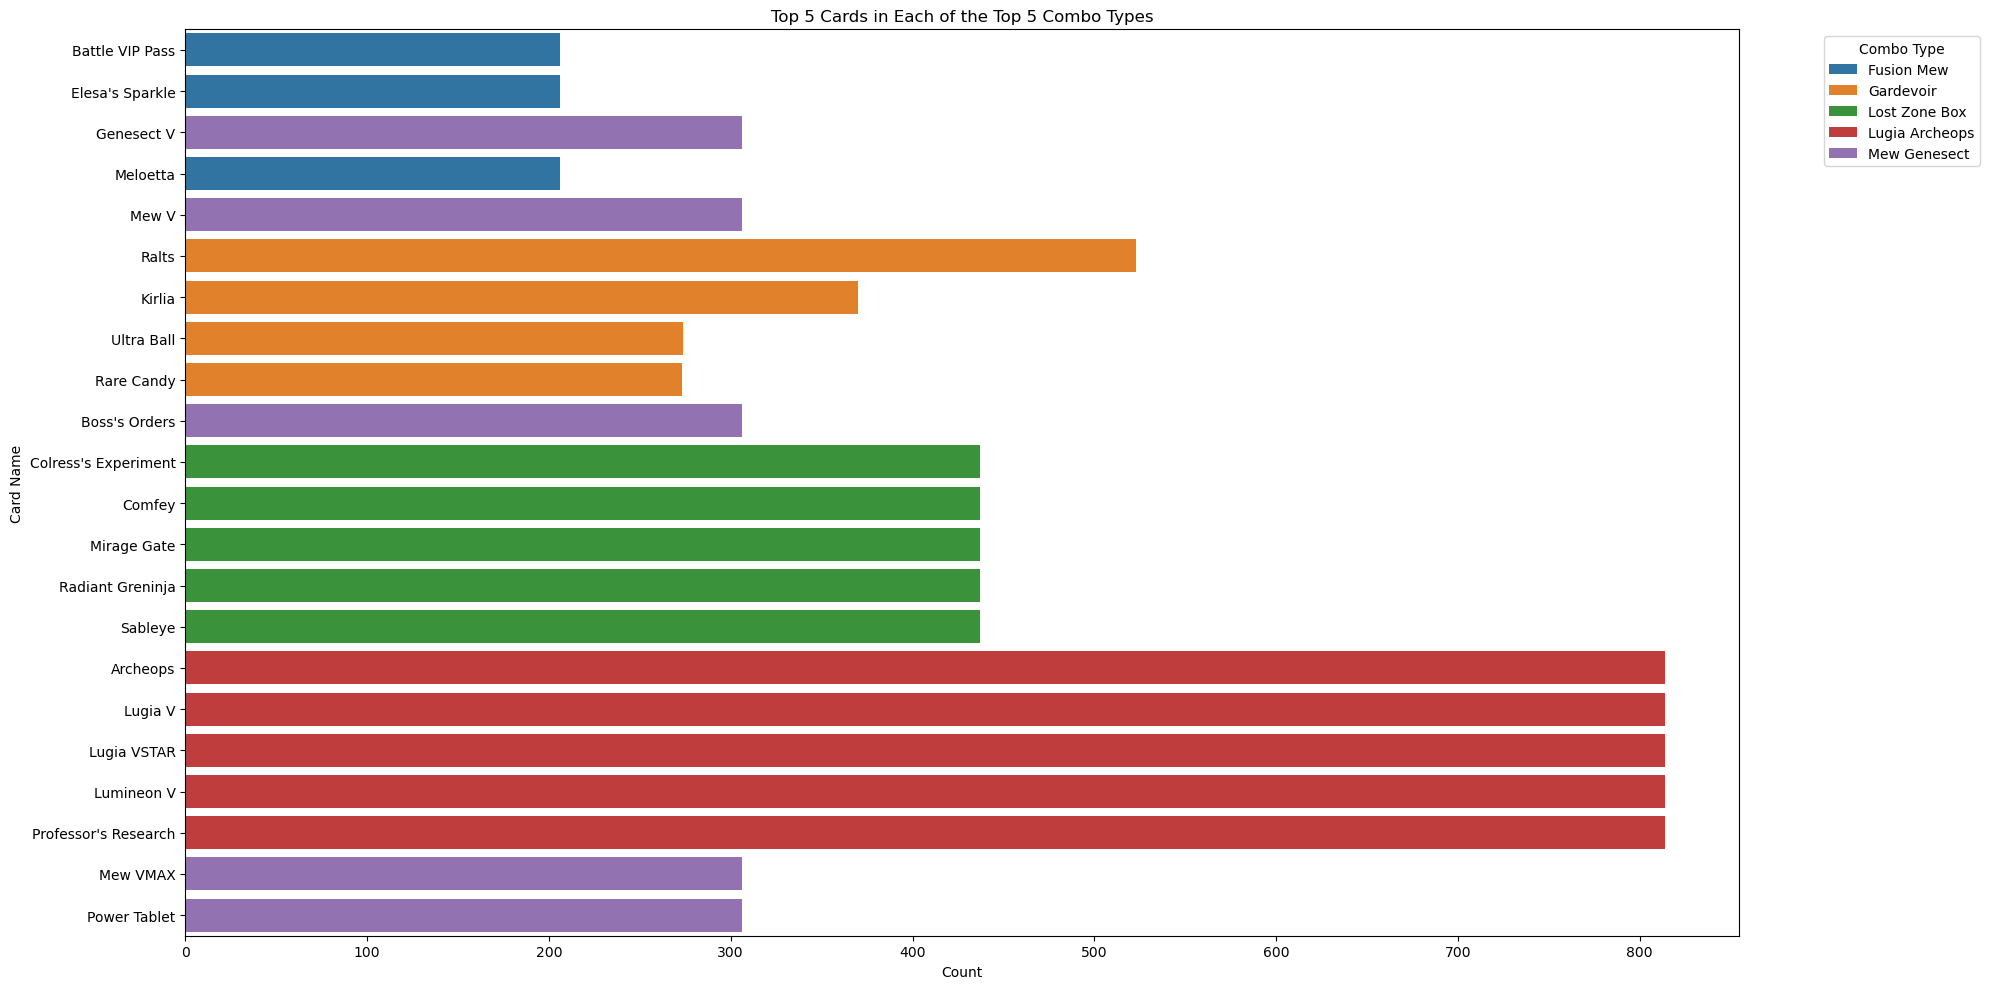

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tournaments.csv")

combo_card_counts = (
    df.groupby(['combo_type_name', 'name_card'])
    .size()
    .reset_index(name='count')
)

top_combos = (
    combo_card_counts.groupby('combo_type_name')['count']
    .sum()
    .nlargest(5)
    .index
)

filtered_data = combo_card_counts[combo_card_counts['combo_type_name'].isin(top_combos)]

top_cards_per_combo = (
    filtered_data.groupby('combo_type_name', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'count'))
)

top_cards_per_combo = top_cards_per_combo.sort_values(['combo_type_name', 'count'], ascending=[True, False])

plt.figure(figsize=(20, 10))
sns.barplot(
    data=top_cards_per_combo,
    x='count',
    y='name_card',
    hue='combo_type_name',
    dodge=False,
    palette="tab10"
)
plt.title("Top 5 Cards in Each of the Top 5 Combo Types")
plt.xlabel("Count")
plt.ylabel("Card Name")
plt.legend(title="Combo Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
